### 2 way ANOVA Single test Plots

PLOT BETWEEN GROUP VARIATION AND WITHIN GROUP VARIATION FOR INDIVIDUAL ANOVA TESTS (PEPTIDES)

In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches #for the plot legend
import seaborn as sb
import collections #easiest way to sort a dict, see http://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
import re #regex
import argparse
import os
import csv

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


EITHER REQUIRE ARGUMENTS VIA COMMAND LINE:

In [2]:
#parser = argparse.ArgumentParser()
#parser.add_argument("--csv_file", required=True, help="The csv file with factors as columns and independent measurements (peptides) as rows")
#parser.add_argument("--num_cat_f1", required=True, type=int, help="The number of levels/categories for factor 1")
#parser.add_argument("--num_cat_f2", required=True, type=int, help="The number of levels/categories for factor 2")
#parser.add_argument("--num_repl", required=True, type=int, help="The number of observations per each factor 1 x factor 2 combination")
#parser.add_argument("--pep_idx", required=True, type=int, help="The index of the peptide (row) in the original dataset")
#args = parser.parse_args()
#datafile = args.csv_file
#datafile_basename = os.path.basename(datafile).split(".")[0]
#if not os.path.isfile(datafile):
#    print "\nFile not found: %s " % datafile + "\n"
#data = pd.read_csv(datafile)   
#num_cat_f1 = args.num_cat_f1
#num_cat_f2 = args.num_cat_f2
#num_repl = args.num_repl
#pep_idx = args.pep_idx

OR HARD-TYPE THEM FOR AN EXAMPLE OR TO SHOW IN NOTEBOOK:

In [21]:
data = pd.read_csv("/home/vital/cyano/Quanti_PeptMatrix.csv")
num_cat_f1 = 3
num_cat_f2 = 8
num_repl = 3

#IPI00221108, TYMS:
protein_id = "TYMS"
pep_idx = 6642 #AEDFQIEGYNPHPTIK
#pep_idx = 9248 #HFGAEYR
#pep_idx = 24249 #IDDFKAEDFQIEGYNPHPTIK
#pep_idx = 29774 #EEGDLGPVYGFQWR
#pep_idx = 32070 #DFLDSLGFSTR 

pep_seq = data.ix[pep_idx].SEQUENCE

Create my custom peptide pandas dataframe

In [22]:
peptide_df = pd.DataFrame(columns=["dependent_variable", "factor_1", "factor_2"])
peptide_df.factor_1 = [ "f1_%s"%cat_f1 for cat_f1 in range(num_cat_f1) for cat_f2 in range(num_cat_f2) for rep in range(num_repl) ]
peptide_df.factor_2 = [ "f2_%s"%cat_f2 for cat_f1 in range(num_cat_f1) for cat_f2 in range(num_cat_f2) for rep in range(num_repl) ]
peptide_df.dependent_variable = data.iloc[pep_idx,].tolist()[1:]


In [23]:
grand_mean = peptide_df.dependent_variable.mean()

#### Factor 1 Plots

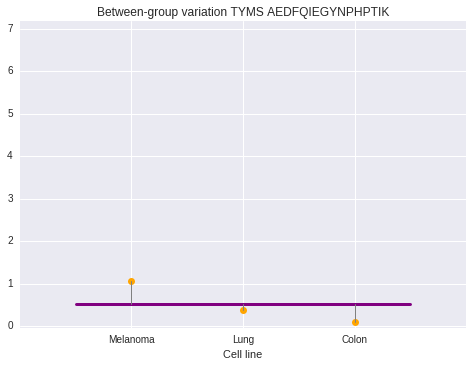

In [26]:
f1_df = {f1_lvl: peptide_df[peptide_df.factor_1 == f1_lvl] for f1_lvl in peptide_df.factor_1.unique()}

f1_means = [f1_df["f1_%s"%i].dependent_variable.mean() for i in range(num_cat_f1)]

y_max = max([max(f1_df["f1_%s"%i].dependent_variable) for i in range(num_cat_f1)])

#Plot between
#Grand mean as a horizonal line
plt.plot([x+1 for x in range(num_cat_f1)], f1_means, 'ro', color='orange')
plt.plot([0.5,num_cat_f1+0.5], [grand_mean, grand_mean], linewidth=3, color='purple')
for i in range(num_cat_f1):
    plt.plot([i+1,i+1], [f1_means[i], grand_mean], linewidth=1, color='gray')

plt.axis([0,num_cat_f1+1,-0.04, y_max+0.5]) 

#ad hoc for FITExP data:
labels = ["Melanoma", "Lung", "Colon"]
plt.xticks([x+1 for x in range(num_cat_f1)], labels)
plt.xlabel("Cell line")
#plt.xlabel("Factor A")
plt.title("Between-group variation %s " % protein_id + pep_seq)
plt.show()

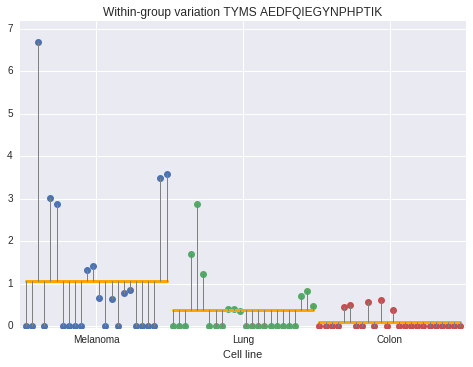

In [27]:
for i in range(num_cat_f1):
    plt.plot(f1_df["f1_%s"%i].dependent_variable, 'o')
    plt.plot([f1_df["f1_%s"%i].index[0],f1_df["f1_%s"%i].index[-1]], [f1_means[i], f1_means[i]], linewidth=3, color='orange')
    for j in f1_df["f1_%s"%i].dependent_variable.index.tolist():
        plt.plot([j,j], [f1_df["f1_%s"%i].dependent_variable[j], f1_means[i]], linewidth=1, color='gray')

plt.axis([-1,f1_df["f1_%s"%(num_cat_f1-1)].index[-1]+1,-0.04, y_max+0.5])
ticks = [np.median(np.array(f1_df["f1_%s"%i].index.tolist())) for i in range(num_cat_f1)]
#tick_labels = [x+1 for x in range(num_cat_f1)]
tick_labels = ["Melanoma", "Lung", "Colon"]
plt.xticks(ticks, tick_labels)
#plt.xlabel("Factor A")
plt.xlabel("Cell line")
plt.title("Within-group variation %s " % protein_id + pep_seq)
plt.show()

#### Factor 2 Plots

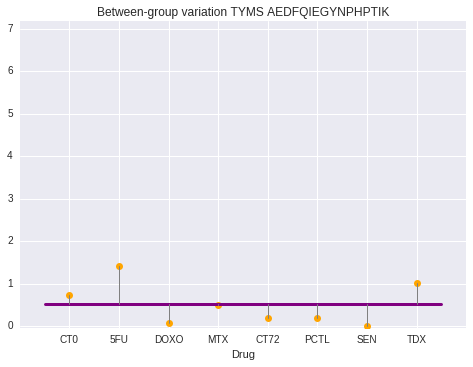

In [28]:
f2_df = {f2_lvl: peptide_df[peptide_df.factor_2 == f2_lvl] for f2_lvl in peptide_df.factor_2.unique()}

f2_means = [f2_df["f2_%s"%i].dependent_variable.mean() for i in range(num_cat_f2)]

y_max = max([max(f2_df["f2_%s"%i].dependent_variable) for i in range(num_cat_f2)])

plt.plot([x+1 for x in range(num_cat_f2)], f2_means, 'ro', color='orange')
plt.plot([0.5,num_cat_f2+0.5], [grand_mean, grand_mean], linewidth=3, color='purple')
for i in range(num_cat_f2):
    plt.plot([i+1,i+1], [f2_means[i], grand_mean], linewidth=1, color='gray')

plt.axis([0,num_cat_f2+1,-0.04, y_max+0.5]) 
tick_labels = ["CT0", "5FU", "DOXO", "MTX", "CT72", "PCTL", "SEN", "TDX"]
plt.xticks([x+1 for x in range(num_cat_f2)], tick_labels)
#plt.xlabel("Factor B")
plt.xlabel("Drug")
plt.title("Between-group variation %s " % protein_id + pep_seq)
plt.show()

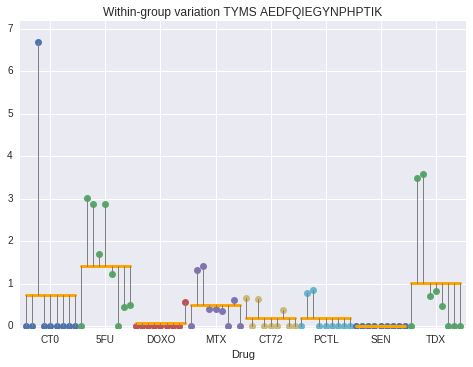

In [30]:
for i in range(num_cat_f2):
    if i == 0:
        f2_df["f2_%s"%i].index	= range(len(f2_df["f2_%s"%i]))
    else:
        f2_df["f2_%s"%i].index = range(f2_df["f2_%s"%(i-1)].index[-1]+1, (f2_df["f2_%s"%(i-1)].index[-1]+1) + len(f2_df["f2_%s"%i])) #this is: range(9,18)
    plt.plot(f2_df["f2_%s"%i].dependent_variable, 'o')
    plt.plot([f2_df["f2_%s"%i].index[0],  f2_df["f2_%s"%i].index[-1]], [f2_means[i], f2_means[i]], linewidth=3, color='orange')
    for j in f2_df["f2_%s"%i].dependent_variable.index.tolist():
        plt.plot([j,j], [f2_df["f2_%s"%i].dependent_variable[j], f2_means[i]], linewidth=1, color='gray')

plt.axis([-1,f1_df["f1_%s"%(num_cat_f1-1)].index[-1]+1,-0.04, y_max+0.5])
ticks = [np.median(np.array(f2_df["f2_%s"%i].index.tolist())) for i in range(num_cat_f2)]
#tick_labels = [x+1 for x in range(num_cat_f2)]
tick_labels = ["CT0", "5FU", "DOXO", "MTX", "CT72", "PCTL", "SEN", "TDX"]
plt.xticks(ticks, tick_labels)
#plt.xlabel("Factor B")
plt.xlabel("Drug")
plt.title("Within-group variation %s " % protein_id + pep_seq)
plt.show()




#### Bar Plot. Grouped

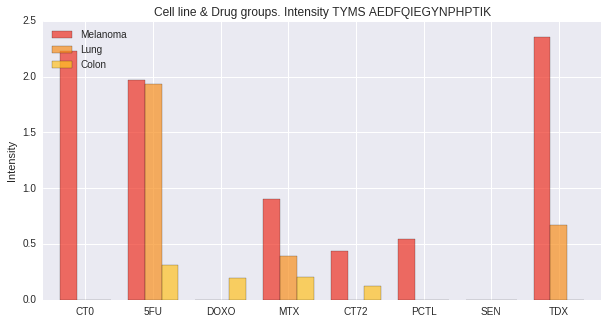

In [32]:

means = peptide_df.groupby(["factor_2", "factor_1"]).apply(lambda x: x.dependent_variable.mean())
means_df = means.unstack()

pos = list(range(len(means_df['f1_0'])))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

colors = ['#EE3224', '#F78F1E', '#FFC222'] #, "teal", "navyblue", "gray", "coal"
for i in range(num_cat_f1):
    if i == 0:
        plt.bar(pos, means_df["f1_%s"%i], width, alpha = 0.7, color=colors[i], label=means_df.index[0])
    else:
        plt.bar([p + width*i for p in pos], means_df["f1_%s"%i], width, alpha = 0.7, color=colors[i], label=means_df.index[1])

ax.set_ylabel('Intensity')
#ax.set_title('Factor2 x Factor1 groups. Intensity')
ax.set_title("Cell line & Drug groups. Intensity. %s " % protein_id + pep_seq)
ax.set_xticks([p + 1.5 * width for p in pos])
#ax.set_xticklabels(means_df.index)
ax.set_xticklabels(["CT0", "5FU", "DOXO", "MTX", "CT72", "PCTL", "SEN", "TDX"])
plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(means_df['f1_0'] + means_df['f1_1'] + means_df['f1_2'])] )
# Adding the legend and showing the plot
#plt.legend(f1_df.keys(), loc='upper left')
plt.legend(["Melanoma", "Lung", "Colon"], loc='upper left')
plt.show()

#### Interaction Plot (Factor 1 x Factor 2)

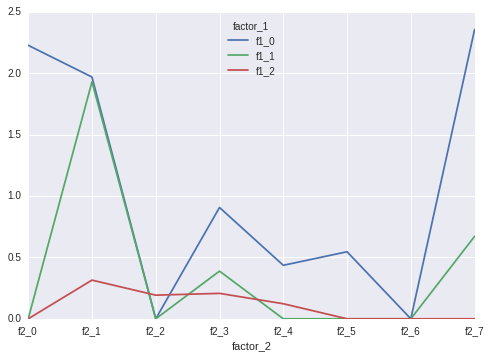

In [33]:
means_df.plot()

basically the same as what stats.interaction_plot does:

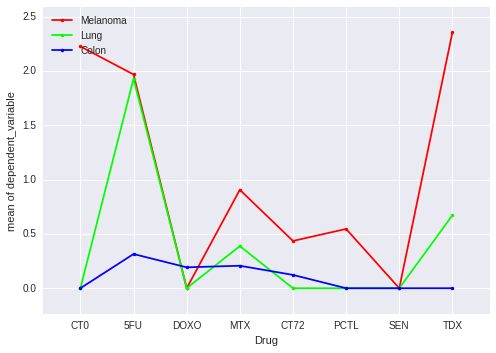

In [39]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(peptide_df.factor_2, peptide_df.factor_1, peptide_df.dependent_variable)
plt.legend(["Melanoma", "Lung", "Colon"], loc='upper left')
tick_labels = ["CT0", "5FU", "DOXO", "MTX", "CT72", "PCTL", "SEN", "TDX"]
plt.xticks([x for x in range(num_cat_f2)], tick_labels)
plt.xlabel("Drug")
plt.show()